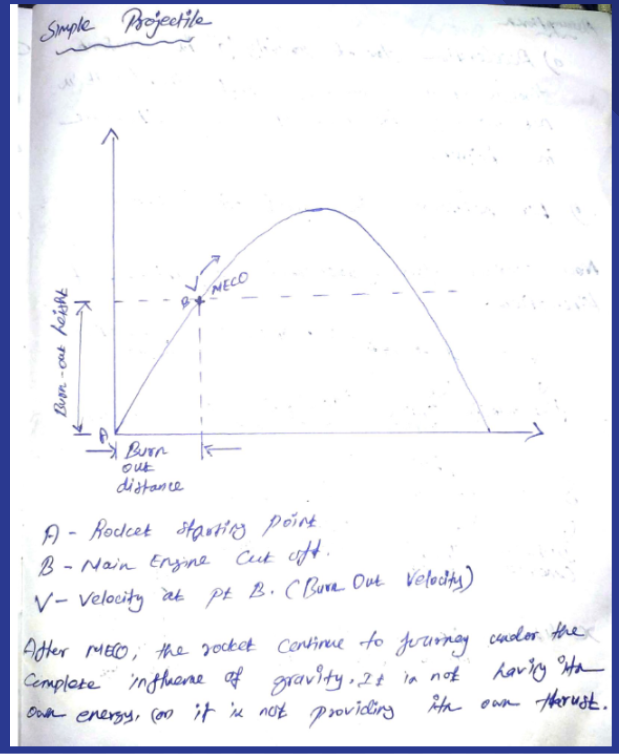

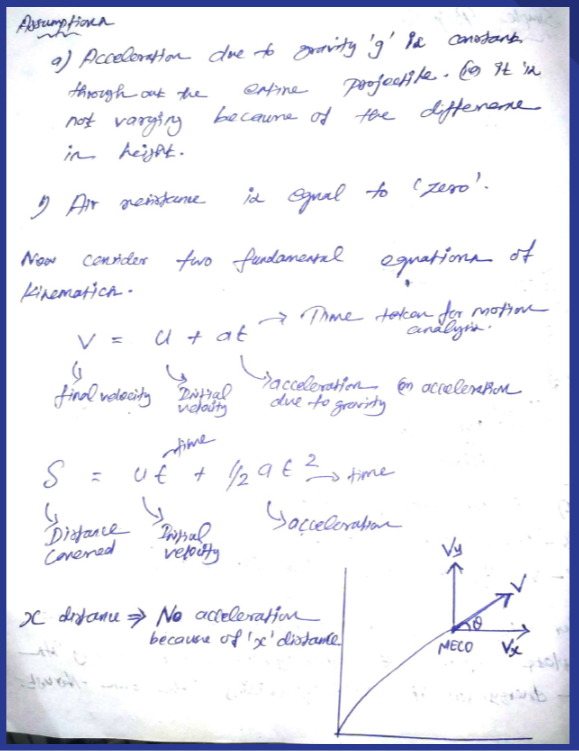

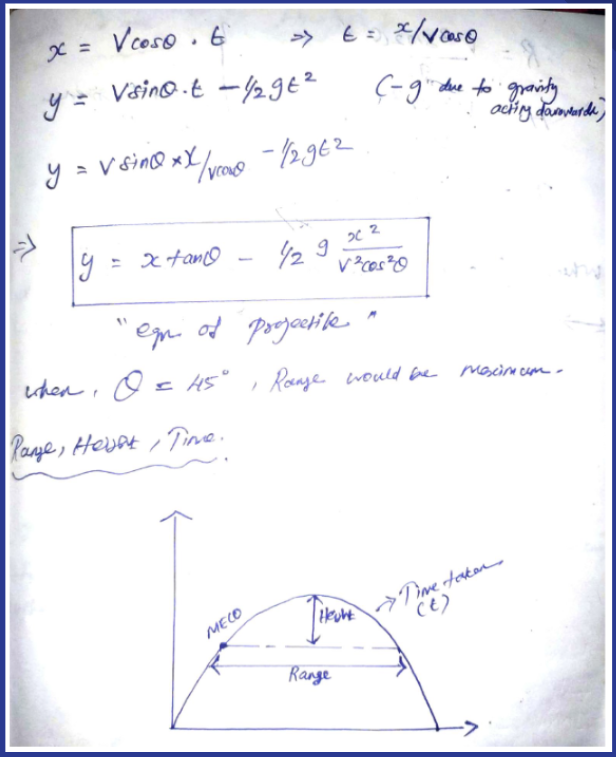

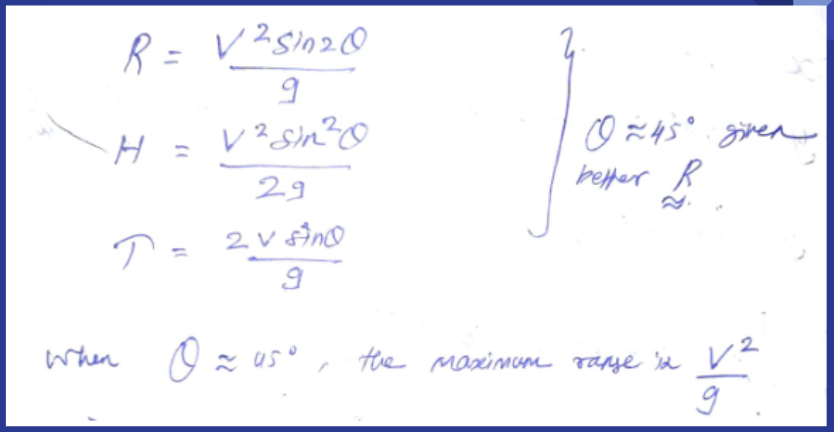

In [26]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

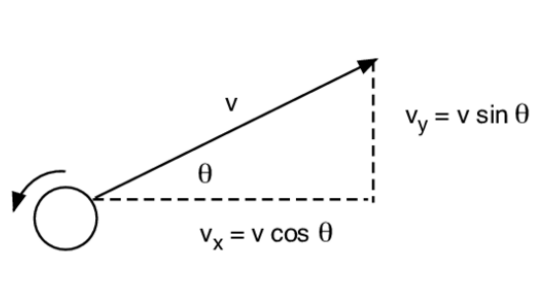

The net force for moving with air friction under gravity is

$$\vec{F}_{\text{net}} = \vec{F}_g + \vec{F}_f = -mg\hat{y} - b|\vec{v}|\vec{v}$$

and noting that $\vec{v} = \dot{x} \hat{x} + \dot{y} \hat{y}$ we get

$$\vec{F}_{\text{net}} = -mg\hat{y} - b\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{x} + \dot{y}\hat{y})$$

or in vector form

$$\vec{F}_{\text{net}} = \begin{bmatrix} - b\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x} \\ -mg - b\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y} \end{bmatrix} $$

Using the fact that $$\vec{F}_{\text{net}} = m\vec{a} = m\left< \ddot{x}, \ddot{y} \right>$$ we get

$$m \begin{bmatrix}\ddot{x} \\ \ddot{y} \end{bmatrix} =  \begin{bmatrix} - b\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x} \\ -mg - b\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y} \end{bmatrix} $$

and thus have two coupled differential equations

$$\ddot{x} = - \frac{b}{m}\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x}$$
$$\ddot{y} = -g - \frac{b}{m}\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y}$$

Defining $x' = x/g$ and $y'=y/g$ we get

$$\ddot{x'} = - \frac{bg}{m}\sqrt{\dot{x'}^2 + \dot{y'}^2}\dot{x'}$$
$$\ddot{y'} = -1 - \frac{bg}{m}\sqrt{\dot{x'}^2 + \dot{y'}^2}\dot{y'}$$

We can thus solve this equation for different values of $B \equiv bg/m$ to get $x'(t)$ and $y'(t)$ which are directly proportional to $x(t)$ and $y(t)$ (we get the same shape). We will drop the primes for now on but recall that there is the divided by $g$ factor.

In python we can only solve systems of first order ODEs, so defining $v_x=\dot{x}$ and $v_y=\dot{y}$ we get a system of 4 coupled first order ODEs.

* $\dot{x} = v_x$
* $\dot{v_x} = - B\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x}$
* $\dot{y} = v_y$
* $\dot{v_y} = -1 - B\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y}$

Define $\vec{S} = \left<x, v_x, y, v_y\right>$. To solve ODEs in python, need to write a funciton that takes in $\vec{S}$ and time $t$, and returns $d\vec{S}/dt$. In other words we want $f$ in 

$$\frac{d\vec{S}}{dt} = f(\vec{S}, t)$$

In [27]:
# Define function f above
def dSdt(t,S,B):
    x, vx, y, vy = S
    return [vx,                                              # Velocity component vx
            -B*np.sqrt(vx**2+vy**2)*vx,                      # Acceleration component  v'x
            vy,                                              # Velocity component vy
            -1-B*np.sqrt(vx**2+vy**2)*vy]                    # Acceleration component v'y

Define friction `B`, initial velocity `V`, and a few angles `t1, t2, t3`

First Try the solution with B=0

In [28]:
B = 0
V = 1
t1 = 40 *np.pi / 180     # 40 Degrees in radians
t2 = 45 *np.pi / 180     # 45 Degrees in radians
t3 = 50 *np.pi / 180     # 50 Degrees in radians

In [29]:
sol1 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t1),0,V*np.sin(t1)], t_eval=np.linspace(0,2,1000), args=(B,)) 
sol2 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t2),0,V*np.sin(t2)], t_eval=np.linspace(0,2,1000), args=(B,)) 
sol3 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t3),0,V*np.sin(t3)], t_eval=np.linspace(0,2,1000), args=(B,)) 

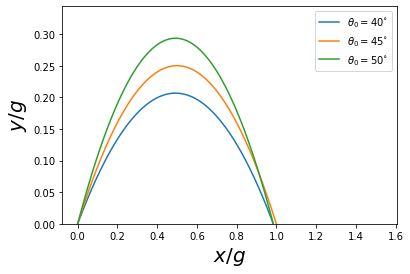

In [30]:
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x/g$', fontsize=20)
plt.ylabel('$y/g$', fontsize=20)
plt.show()



> All angles are giving perfect parabola....with no friction...



Try the Solver with Friction effects

In [31]:
B = 1 
V = 1
t1 = 40 *np.pi / 180     # 40 Degrees in radians
t2 = 45 *np.pi / 180     # 45 Degrees in radians
t3 = 50 *np.pi / 180     # 50 Degrees in radians

Solve the ODE using scipy's `solve_ivp` method. Function takes in the $d\vec{S}/dt$ function, time period to solve over `[0,2]`seconds, initial conditions, `t_eval` to evaluate on, and addition arguments `B` (friction force) for the function. Also we set  

In [32]:
sol1 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t1),0,V*np.sin(t1)], t_eval=np.linspace(0,2,1000), args=(B,)) 
sol2 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t2),0,V*np.sin(t2)], t_eval=np.linspace(0,2,1000), args=(B,)) 
sol3 = solve_ivp(dSdt, [0, 2], y0=[0,V*np.cos(t3),0,V*np.sin(t3)], t_eval=np.linspace(0,2,1000), args=(B,)) 



> The argumement dSdt referring to ODE ,y0 refers initial velocity and intial acceleration components. [0,2] >>> projectile endurance and also it is discretized into 1000 time spaces. B refers Friction term.

In [33]:
sol1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.002002  , 0.004004  , 0.00600601, 0.00800801,
       0.01001001, 0.01201201, 0.01401401, 0.01601602, 0.01801802,
       0.02002002, 0.02202202, 0.02402402, 0.02602603, 0.02802803,
       0.03003003, 0.03203203, 0.03403403, 0.03603604, 0.03803804,
       0.04004004, 0.04204204, 0.04404404, 0.04604605, 0.04804805,
       0.05005005, 0.05205205, 0.05405405, 0.05605606, 0.05805806,
       0.06006006, 0.06206206, 0.06406406, 0.06606607, 0.06806807,
       0.07007007, 0.07207207, 0.07407407, 0.07607608, 0.07807808,
       0.08008008, 0.08208208, 0.08408408, 0.08608609, 0.08808809,
       0.09009009, 0.09209209, 0.09409409, 0.0960961 , 0.0980981 ,
       0.1001001 , 0.1021021 , 0.1041041 , 0.10610611, 0.10810811,
       0.11011011, 0.11211211, 0.11411411, 0.11611612, 0.11811812,
       0.12012012,

In [34]:
sol1.y[0].shape   #>>>>> Velocity x component 

(1000,)

In [35]:
sol1.y[2].shape  #>>>>> Velocity y component

(1000,)

Plot a few of the solutions

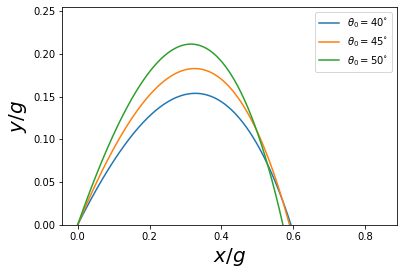

In [36]:
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x/g$', fontsize=20)
plt.ylabel('$y/g$', fontsize=20)
plt.show()



> This function gets the distance $x/g$ that the ball traveled before it hits the ground when traveling at an initial velocity $V$.

> Green Projectile i.e angle = 50 , obtained maximum height but range is not optimum.

> Orange Projectile i.e angle = 45, obtained height next to green and range is much better than Green Projectile

> Blue Projectile i.e angle = 40, obtained height lower than other two , but range is almost equal to orange projectile.














#-----------------------------------------------------------------------------#

In [37]:
def get_distance(angle, B, V=1, t=2):
    v0x = V*np.cos(angle*np.pi/180)   # acceleration components
    v0y = V*np.sin(angle*np.pi/180)   # 
    sol = solve_ivp(dSdt, [0, t], y0=[0,v0x,0,v0y], t_eval=np.linspace(0,t,10000), args=(B,)) #ODE solver
    just_above_idx = np.where(np.diff(np.sign(sol.y[2])) < 0)[0][0]
    just_below_idx = just_above_idx + 1
    x_loc = (sol.y[0][just_above_idx] + sol.y[0][just_below_idx])/2
    return x_loc

In [38]:
sol1.y[2]   # y_components (y_distance)

array([ 0.00000000e+00,  1.28357353e-03,  2.56058430e-03,  3.83105372e-03,
        5.09500301e-03,  6.35245326e-03,  7.60342536e-03,  8.84794006e-03,
        1.00860180e-02,  1.13176818e-02,  1.25429520e-02,  1.37618484e-02,
        1.49743903e-02,  1.61805973e-02,  1.73804885e-02,  1.85740831e-02,
        1.97614002e-02,  2.09424586e-02,  2.21172772e-02,  2.32858747e-02,
        2.44482697e-02,  2.56044805e-02,  2.67545256e-02,  2.78984232e-02,
        2.90361914e-02,  3.01678482e-02,  3.12934114e-02,  3.24128989e-02,
        3.35263283e-02,  3.46337172e-02,  3.57350828e-02,  3.68304427e-02,
        3.79198138e-02,  3.90032134e-02,  4.00806584e-02,  4.11521656e-02,
        4.22177517e-02,  4.32774333e-02,  4.43312271e-02,  4.53791492e-02,
        4.64212161e-02,  4.74574438e-02,  4.84878483e-02,  4.95124457e-02,
        5.05312517e-02,  5.15442819e-02,  5.25515520e-02,  5.35530774e-02,
        5.45488735e-02,  5.55389554e-02,  5.65233383e-02,  5.75020372e-02,
        5.84750669e-02,  

In [39]:
np.sign(sol1.y[2])

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [40]:
#NumPy's np. diff() function calculates the difference between subsequent values in a NumPy array. For example, np. diff([1, 2, 4]) returns the difference array [1 2] 

In [41]:
(np.sign([1,2,3]))

array([1, 1, 1])

In [42]:
np. diff(np.sign([1,2,3]))

array([0, 0])

In [43]:
np.diff(np.sign(sol1.y[2]))

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [44]:
np.diff(np.sign(sol1.y[2])) < 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [45]:
np.where(np.diff(np.sign(sol1.y[2])) < 0)

(array([551]),)

In [46]:
np.where(np.diff(np.sign(sol1.y[2])) < 0)[0]

array([551])

In [47]:
np.where(np.diff(np.sign(sol1.y[2])) < 0)[0][0]

551

In [48]:
sol1.y[0]

array([0.        , 0.00153209, 0.00306113, 0.00458712, 0.0061101 ,
       0.00763007, 0.00914705, 0.01066105, 0.0121721 , 0.0136802 ,
       0.01518537, 0.01668764, 0.018187  , 0.01968349, 0.0211771 ,
       0.02266787, 0.02415579, 0.02564089, 0.02712317, 0.02860267,
       0.03007937, 0.03155331, 0.0330245 , 0.03449294, 0.03595866,
       0.03742166, 0.03888196, 0.04033958, 0.04179452, 0.0432468 ,
       0.04469644, 0.04614344, 0.04758782, 0.04902959, 0.05046877,
       0.05190537, 0.0533394 , 0.05477087, 0.0561998 , 0.05762619,
       0.05905007, 0.06047144, 0.06189031, 0.0633067 , 0.06472063,
       0.06613209, 0.06754111, 0.06894769, 0.07035185, 0.07175359,
       0.07315294, 0.0745499 , 0.07594449, 0.0773367 , 0.07872657,
       0.08011409, 0.08149928, 0.08288214, 0.0842627 , 0.08564096,
       0.08701693, 0.08839062, 0.08976205, 0.09113122, 0.09249814,
       0.09386283, 0.09522529, 0.09658553, 0.09794358, 0.09929942,
       0.10065308, 0.10200457, 0.10335389, 0.10470105, 0.10604

In [49]:
sol1.y[0][551]

0.5927463645535175

In [50]:
sol1.y[0][552]

0.5935181818971527

In [51]:
def get_distance(angle, B, V=1, t=2):
    v0x = V*np.cos(angle*np.pi/180)   # acceleration components
    v0y = V*np.sin(angle*np.pi/180)   # 
    sol = solve_ivp(dSdt, [0, t], y0=[0,v0x,0,v0y], t_eval=np.linspace(0,t,10000), args=(B,)) #ODE solver
    just_above_idx = np.where(np.diff(np.sign(sol.y[2])) < 0)[0][0]
    just_below_idx = just_above_idx + 1
    x_loc = (sol.y[0][just_above_idx] + sol.y[0][just_below_idx])/2
    return x_loc

Look at the two cases above

In [52]:
print(f'Launch angle 45 degrees distance travelled:  {get_distance(45, B=1, V=1)}')
print(f'Launch angle 40 degrees distance travelled:  {get_distance(40, B=1, V=1)}')

Launch angle 45 degrees distance travelled:  0.5890927231260639
Launch angle 40 degrees distance travelled:  0.5934046573804621


Lets find these distances for a bunch of angles:

In [53]:
angles = np.linspace(30, 60, 200)
x_locs = np.vectorize(get_distance)(angles, B=1)

In [54]:
angles

array([30.        , 30.15075377, 30.30150754, 30.45226131, 30.60301508,
       30.75376884, 30.90452261, 31.05527638, 31.20603015, 31.35678392,
       31.50753769, 31.65829146, 31.80904523, 31.95979899, 32.11055276,
       32.26130653, 32.4120603 , 32.56281407, 32.71356784, 32.86432161,
       33.01507538, 33.16582915, 33.31658291, 33.46733668, 33.61809045,
       33.76884422, 33.91959799, 34.07035176, 34.22110553, 34.3718593 ,
       34.52261307, 34.67336683, 34.8241206 , 34.97487437, 35.12562814,
       35.27638191, 35.42713568, 35.57788945, 35.72864322, 35.87939698,
       36.03015075, 36.18090452, 36.33165829, 36.48241206, 36.63316583,
       36.7839196 , 36.93467337, 37.08542714, 37.2361809 , 37.38693467,
       37.53768844, 37.68844221, 37.83919598, 37.98994975, 38.14070352,
       38.29145729, 38.44221106, 38.59296482, 38.74371859, 38.89447236,
       39.04522613, 39.1959799 , 39.34673367, 39.49748744, 39.64824121,
       39.79899497, 39.94974874, 40.10050251, 40.25125628, 40.40

In [55]:
x_locs 

array([0.55789526, 0.55887126, 0.55983635, 0.56079051, 0.56173375,
       0.56266606, 0.56358744, 0.56449788, 0.56539737, 0.56628591,
       0.56716349, 0.56803011, 0.56888577, 0.56963925, 0.57047324,
       0.57129624, 0.5720179 , 0.5728192 , 0.5735197 , 0.57429927,
       0.57497859, 0.5757364 , 0.57639451, 0.57713054, 0.57776741,
       0.57839378, 0.57900965, 0.57970232, 0.58029689, 0.58088093,
       0.58145444, 0.5820174 , 0.58256982, 0.58311168, 0.58364297,
       0.58416368, 0.58467381, 0.58517335, 0.58557794, 0.58605654,
       0.58652452, 0.58698187, 0.58734529, 0.58778163, 0.58812455,
       0.58853984, 0.58886221, 0.58925641, 0.58955819, 0.58993127,
       0.59021242, 0.59048338, 0.59082483, 0.5910751 , 0.59131514,
       0.59154494, 0.59176449, 0.59197378, 0.5921728 , 0.59236153,
       0.59253997, 0.5927081 , 0.59286592, 0.59301342, 0.59315058,
       0.59327739, 0.59331667, 0.59342301, 0.59351896, 0.5935281 ,
       0.59360351, 0.59359257, 0.59364739, 0.59361634, 0.59365

Plot the distance travelled before hitting the ground over a bunch of different launch angles (at $V=1$)

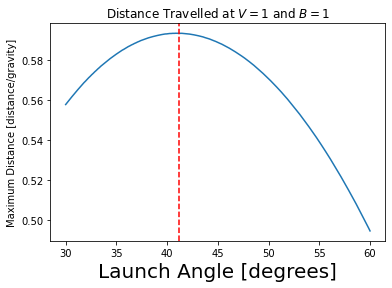

In [56]:
plt.plot(angles, x_locs)
plt.xlabel('Launch Angle [degrees]', fontsize=20)
plt.ylabel('Maximum Distance [distance/gravity]')
plt.axvline(angles[np.argmax(x_locs)], ls='--', color='r')   #Draw red dot line where x_loc is maximum.
plt.title('Distance Travelled at $V=1$ and $B=1$')
plt.show()

Lets find the angle that gives the maximum distance as a function of $B$. We will do this for two values of $V$: $V=1$ and $V=2$:

In [57]:
V1 = 1
V2 = 2
angles = np.linspace(35, 45, 200)
Bs =  np.linspace(0, 1, 50)

In [58]:
angles

array([35.        , 35.05025126, 35.10050251, 35.15075377, 35.20100503,
       35.25125628, 35.30150754, 35.35175879, 35.40201005, 35.45226131,
       35.50251256, 35.55276382, 35.60301508, 35.65326633, 35.70351759,
       35.75376884, 35.8040201 , 35.85427136, 35.90452261, 35.95477387,
       36.00502513, 36.05527638, 36.10552764, 36.15577889, 36.20603015,
       36.25628141, 36.30653266, 36.35678392, 36.40703518, 36.45728643,
       36.50753769, 36.55778894, 36.6080402 , 36.65829146, 36.70854271,
       36.75879397, 36.80904523, 36.85929648, 36.90954774, 36.95979899,
       37.01005025, 37.06030151, 37.11055276, 37.16080402, 37.21105528,
       37.26130653, 37.31155779, 37.36180905, 37.4120603 , 37.46231156,
       37.51256281, 37.56281407, 37.61306533, 37.66331658, 37.71356784,
       37.7638191 , 37.81407035, 37.86432161, 37.91457286, 37.96482412,
       38.01507538, 38.06532663, 38.11557789, 38.16582915, 38.2160804 ,
       38.26633166, 38.31658291, 38.36683417, 38.41708543, 38.46

In [59]:
Bs

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [60]:
results_v1 = [np.vectorize(get_distance)(angles, B=B, V=V1) for B in Bs]   # 50 result box with 200 results (distance) 
                                                                           # Each distance is indexed with friction value and angle value
opt_angles_v1 = [angles[np.argmax(result)] for result in results_v1]       # For each result Box ,get the highest value and corresponding angle

In [68]:
opt_angles_v1 

[44.949748743718594,
 44.89949748743719,
 44.698492462311556,
 44.597989949748744,
 44.74874371859296,
 44.2964824120603,
 44.246231155778894,
 44.246231155778894,
 44.19597989949749,
 44.19597989949749,
 44.04522613065327,
 43.79396984924623,
 43.69346733668342,
 43.49246231155779,
 43.44221105527638,
 43.49246231155779,
 43.391959798994975,
 43.19095477386935,
 43.24120603015076,
 43.19095477386935,
 42.98994974874372,
 42.93969849246231,
 42.88944723618091,
 42.63819095477387,
 42.688442211055275,
 42.63819095477387,
 42.73869346733668,
 42.437185929648244,
 42.336683417085425,
 42.336683417085425,
 42.336683417085425,
 42.185929648241206,
 41.88442211055276,
 42.03517587939699,
 42.03517587939699,
 41.88442211055276,
 41.68341708542714,
 41.733668341708544,
 41.733668341708544,
 41.733668341708544,
 41.33165829145729,
 41.582914572864325,
 41.28140703517588,
 41.28140703517588,
 41.231155778894475,
 41.18090452261306,
 41.08040201005025,
 41.130653266331656,
 41.18090452261306,
 40

In [61]:
len(results_v1)

50

In [62]:
results_v1[0].shape

(200,)

In [63]:
len(opt_angles_v1)

50

In [64]:
results_v2 = [np.vectorize(get_distance)(angles, B=B, V=V2, t=6) for B in Bs]     # Additionally 't' is set as 6
opt_angles_v2 = [angles[np.argmax(result)] for result in results_v2]

In [69]:
opt_angles_v2

[44.798994974874375,
 44.597989949748744,
 43.79396984924623,
 43.49246231155779,
 43.44221105527638,
 42.8391959798995,
 42.537688442211056,
 42.28643216080402,
 41.984924623115575,
 41.63316582914573,
 41.482412060301506,
 41.33165829145729,
 40.82914572864322,
 41.030150753768844,
 40.527638190954775,
 40.32663316582914,
 40.175879396984925,
 39.9748743718593,
 39.92462311557789,
 39.57286432160804,
 39.42211055276382,
 39.2713567839196,
 39.07035175879397,
 38.869346733668344,
 38.71859296482412,
 38.66834170854271,
 39.07035175879397,
 38.36683417085427,
 38.36683417085427,
 38.31658291457286,
 38.31658291457286,
 38.266331658291456,
 37.8643216080402,
 37.814070351758794,
 37.51256281407035,
 37.462311557788944,
 37.21105527638191,
 37.11055276381909,
 37.11055276381909,
 37.21105527638191,
 37.1608040201005,
 36.75879396984924,
 36.75879396984924,
 36.70854271356784,
 36.70854271356784,
 36.75879396984924,
 36.35678391959799,
 36.35678391959799,
 36.35678391959799,
 36.256281407

Plot the results

Plot is made between Optimal Angle can be taken from each each result box as each result box is meant for different friction values.

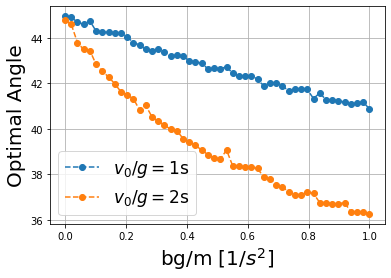

In [65]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()



> As Friction factor increases , Optimal Angle decreases to obtain max range...



How does this correspond to regular objects? Lets look at a golf ball and a soccer ball:

Now $b = \frac{1}{2} \rho A C_d$ and 

* for a golf ball, $m=0.045~\text{kg}$ and $r=0.021~\text{m}$ and $C_d \approx 0.5$
* for a soccer ball $m=0.45~\text{kg}$ and $r=0.11~\text{m}$ and $C_d \approx 0.2$
* for  air, $\rho = 1.225~\text{kg/m}$

The formula for $B$ becomes

$$B \equiv \frac{bg}{m} = \frac{1}{2}\frac{\rho \pi r^2 C_d g}{m}$$

"Sources" 

https://www.scirp.org/journal/paperinformation.aspx?paperid=85529

https://www.brunel.ac.uk/~spstnpl/LearningResources/SoccerKickLab.pdf

https://athleticlift.com/how-fast-can-you-kick-soccer-ball/#:~:text=From%20research%2C%20it%20shows%20that%20youth%20soccer%20athletes,kick%20a%20soccer%20ball%20through%20your%20phone%20camera.

In [66]:
rho = 1.225
g = 9.81

# Golf
r = 0.021
Cd = 0.5
m = 0.045
B_golf = 0.5 * rho * np.pi * r**2 * Cd * g /m

# Soccer
r = 0.22 / 2
Cd = 0.2
m = 0.45
B_soc = 0.5 * rho * np.pi * r**2 * Cd * g /m

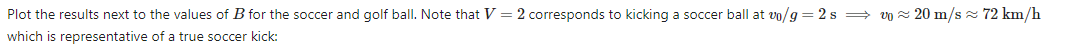

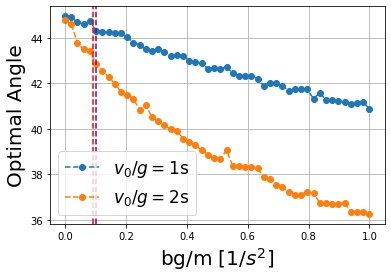

In [67]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()
plt.axvline(B_golf, ls='--', color='r')
plt.axvline(B_soc, ls='--', color='purple')